In [1]:
nombre = "\n Ricardo Madrigal Urencio \n"
print(nombre)
import matplotlib.pyplot as plt


 Ricardo Madrigal Urencio 



In [2]:
dir_hdfs = "hdfs://namenode:9000/tmp/amd/ecobiciretiros"

dfret = spark.read.csv(dir_hdfs, header = True, inferSchema = True)

print(nombre)
dfret.printSchema()


 Ricardo Madrigal Urencio 

root
 |-- id: integer (nullable = true)
 |-- Genero_Usuario: string (nullable = true)
 |-- Edad_Usuario: double (nullable = true)
 |-- Bici: integer (nullable = true)
 |-- Ciclo_Estacion_Retiro: integer (nullable = true)
 |-- Fecha_Retiro: date (nullable = true)
 |-- dia_sem_retiro: string (nullable = true)
 |-- num_dia_retiro: integer (nullable = true)
 |-- num_mes_retiro: integer (nullable = true)
 |-- mes_retiro: string (nullable = true)
 |-- anio_retiro: integer (nullable = true)
 |-- Hora_Retiro: timestamp (nullable = true)
 |-- num_hora_retiro: integer (nullable = true)
 |-- minuto_retiro: integer (nullable = true)
 |-- segundo_retiro: integer (nullable = true)



In [3]:
dir_hdfs = "hdfs://namenode:9000/tmp/amd/ecobiciarribos"

dfarr = spark.read.csv(dir_hdfs, header = True, inferSchema = True)

print(nombre)
dfarr.printSchema()


 Ricardo Madrigal Urencio 

root
 |-- id: integer (nullable = true)
 |-- Genero_Usuario: string (nullable = true)
 |-- Edad_Usuario: double (nullable = true)
 |-- Bici: integer (nullable = true)
 |-- Ciclo_Estacion_Arribo: integer (nullable = true)
 |-- Fecha_Arribo: date (nullable = true)
 |-- dia_sem_arribo: string (nullable = true)
 |-- num_dia_arribo: integer (nullable = true)
 |-- num_mes_arribo: integer (nullable = true)
 |-- mes_arribo: string (nullable = true)
 |-- anio_arribo: integer (nullable = true)
 |-- Hora_Arribo: timestamp (nullable = true)
 |-- num_hora_arribo: integer (nullable = true)
 |-- minuto_arribo: integer (nullable = true)
 |-- segundo_arribo: integer (nullable = true)



In [4]:
spark.sql("show tables").show()

dfret.createOrReplaceTempView("ecobiciretiros")
dfarr.createOrReplaceTempView("ecobiciarribos")
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
+---------+---------+-----------+

+---------+--------------+-----------+
|namespace|     tableName|isTemporary|
+---------+--------------+-----------+
|         |ecobiciarribos|       true|
|         |ecobiciretiros|       true|
+---------+--------------+-----------+



In [5]:
print(nombre)

print("Ecobici Retiros")
spark.sql("describe ecobiciretiros").show()

print("Ecobici Arribos")
spark.sql("describe ecobiciarribos").show()


 Ricardo Madrigal Urencio 

Ecobici Retiros
+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|                  id|      int|   NULL|
|      Genero_Usuario|   string|   NULL|
|        Edad_Usuario|   double|   NULL|
|                Bici|      int|   NULL|
|Ciclo_Estacion_Re...|      int|   NULL|
|        Fecha_Retiro|     date|   NULL|
|      dia_sem_retiro|   string|   NULL|
|      num_dia_retiro|      int|   NULL|
|      num_mes_retiro|      int|   NULL|
|          mes_retiro|   string|   NULL|
|         anio_retiro|      int|   NULL|
|         Hora_Retiro|timestamp|   NULL|
|     num_hora_retiro|      int|   NULL|
|       minuto_retiro|      int|   NULL|
|      segundo_retiro|      int|   NULL|
+--------------------+---------+-------+

Ecobici Arribos
+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|                  id|      int|   N

In [6]:
#Mostar las 10 estaciones con mayores viajes de inicio

campo = "Ciclo_Estacion_Retiro"

print(nombre)

sqlstr = f"""select {campo} estacion_inicio, count(*) viajes_realizados
from ecobiciretiros
group by {campo} 
order by viajes_realizados desc
"""
spark.sql(sqlstr).show(10, truncate=False)


 Ricardo Madrigal Urencio 

+---------------+-----------------+
|estacion_inicio|viajes_realizados|
+---------------+-----------------+
|271            |80802            |
|27             |70205            |
|1              |66958            |
|64             |51541            |
|182            |51433            |
|266            |49836            |
|18             |49528            |
|36             |49433            |
|41             |47492            |
|43             |45540            |
+---------------+-----------------+
only showing top 10 rows



In [7]:
#Mostrar las 5 horas con mayor demanda

campo = "num_hora_retiro"
campo2 = "num_hora_arribo"

print(nombre)

print("Mayor Demanda de Retiros")
sqlstr = f"""select {campo}, count(*) viajes_realizados
from ecobiciretiros
group by {campo}
order by viajes_realizados desc
"""
spark.sql(sqlstr).show(5, truncate=False)

print("Mayor Demanda de Arribos")
sqlstr = f"""select {campo2}, count(*) viajes_realizados
from ecobiciarribos
group by {campo2}
order by viajes_realizados desc
"""
spark.sql(sqlstr).show(5, truncate=False)


 Ricardo Madrigal Urencio 

Mayor Demanda de Retiros
+---------------+-----------------+
|num_hora_retiro|viajes_realizados|
+---------------+-----------------+
|8              |777780           |
|18             |764744           |
|19             |589075           |
|9              |580670           |
|17             |556561           |
+---------------+-----------------+
only showing top 5 rows

Mayor Demanda de Arribos
+---------------+-----------------+
|num_hora_arribo|viajes_realizados|
+---------------+-----------------+
|18             |732207           |
|8              |712740           |
|9              |666475           |
|19             |649036           |
|14             |522642           |
+---------------+-----------------+
only showing top 5 rows



In [8]:
#Mostrar el día de la semana con menor demanda
campo = "dia_sem_retiro"
campo2 = "dia_sem_arribo"


print(nombre)

print("Dia con Menor Demanda de Retiros")
sqlstr = f"""select {campo}, count(*) viajes_realizados
from ecobiciretiros
group by {campo}
order by viajes_realizados asc
"""
spark.sql(sqlstr).show(1, truncate=False)

print("Dia con Menor Demanda de Arribos")
sqlstr = f"""select {campo2}, count(*) viajes_realizados
from ecobiciarribos
group by {campo2}
order by viajes_realizados asc
"""
spark.sql(sqlstr).show(1, truncate=False)


 Ricardo Madrigal Urencio 

Dia con Menor Demanda de Retiros
+--------------+-----------------+
|dia_sem_retiro|viajes_realizados|
+--------------+-----------------+
|Sunday        |500866           |
+--------------+-----------------+
only showing top 1 row

Dia con Menor Demanda de Arribos
+--------------+-----------------+
|dia_sem_arribo|viajes_realizados|
+--------------+-----------------+
|Sunday        |501722           |
+--------------+-----------------+
only showing top 1 row




 Ricardo Madrigal Urencio 

En esta gráfica podemos ver la demanda por mes ordenada del mes con mayor demanda al mes con menor demanda.

Como se observa, el conjunto de datos del 2019 no cuenta con los registros del mes de Enero.



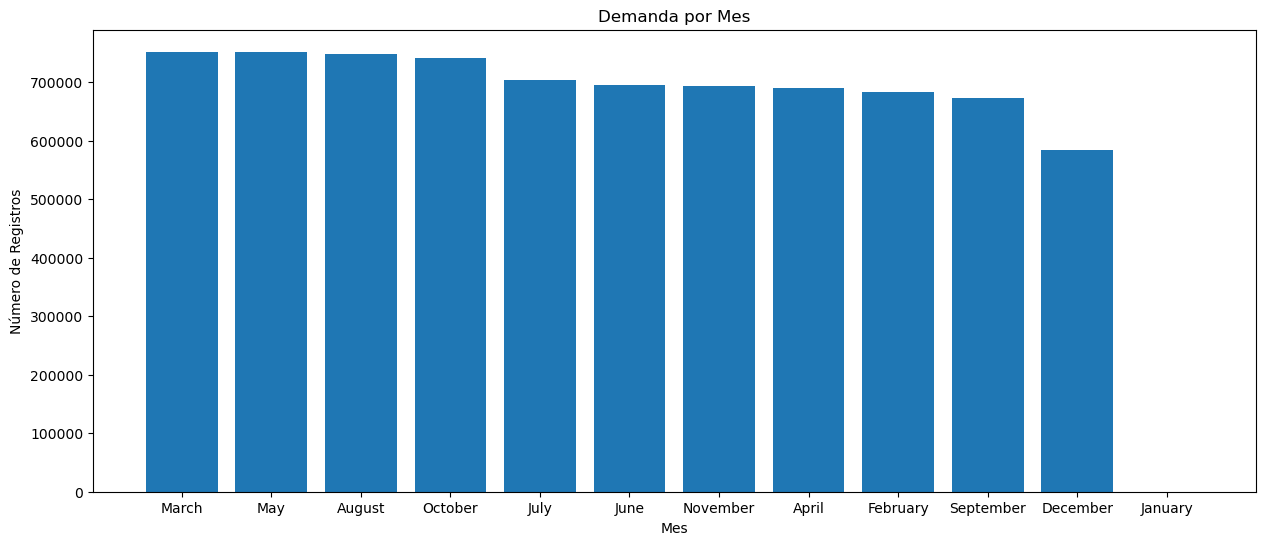

In [9]:
#Genearar 5 Gráficas
##Gráfica de demanda por mes
campo = "mes_retiro"

sqlstr = f"""select {campo}, count(*) viajes_realizados
from ecobiciretiros
group by {campo}
order by viajes_realizados desc
"""

print(nombre)
dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(15,6))
plt.bar(dfh['mes_retiro'], dfh['viajes_realizados'])

plt.xlabel('Mes')
plt.ylabel('Número de Registros')
plt.title('Demanda por Mes')

print("En esta gráfica podemos ver la demanda por mes ordenada del mes con mayor demanda al mes con menor demanda.\n")
print("Como se observa, el conjunto de datos del 2019 no cuenta con los registros del mes de Enero.\n")


 Ricardo Madrigal Urencio 

En esta gráfica podemos observar que la hora con mayor demanda a lo largo del año fue entre las 8:00 am y las 9:00 am.

Mientras que las horas sin demnada ocurrieron entre la 1:00 am y las 4:00 am.



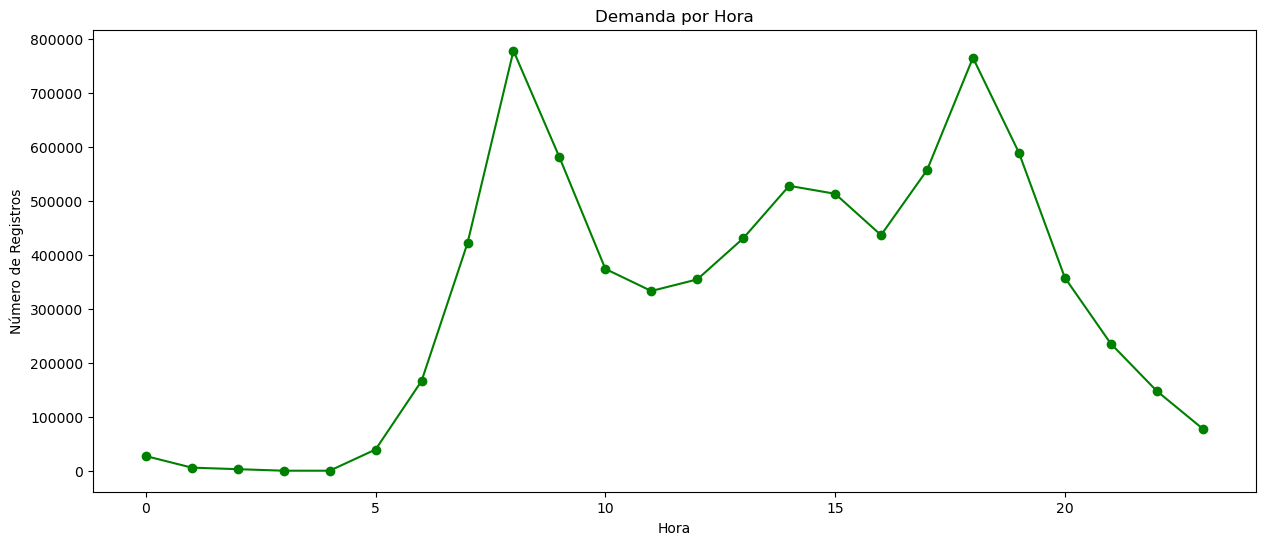

In [10]:
##Gráfica de demanda por hora
campo = "num_hora_retiro"

sqlstr = f"""select {campo} hora, count(*) viajes_realizados
from ecobiciretiros
group by  hora
order by 1
"""

print(nombre)
dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(15,6))
plt.plot(dfh['hora'], dfh['viajes_realizados'], marker='o', linestyle='-', color='g')

plt.xlabel('Hora')
plt.ylabel('Número de Registros')
plt.title('Demanda por Hora')

print("En esta gráfica podemos observar que la hora con mayor demanda a lo largo del año fue entre las 8:00 am y las 9:00 am.\n")
print("Mientras que las horas sin demnada ocurrieron entre la 1:00 am y las 4:00 am.\n")


 Ricardo Madrigal Urencio 

+--------+-----------------+
|estacion|viajes_realizados|
+--------+-----------------+
|     266|            84225|
|      27|            71442|
|       1|            69960|
|     271|            58273|
|      64|            55807|
+--------+-----------------+
only showing top 5 rows

En esta grafica se observa que las estaciones 266, 27, 1, 271 y 64 son las que recibieron la mayor cantidad de bicicletas a lo largo del año.



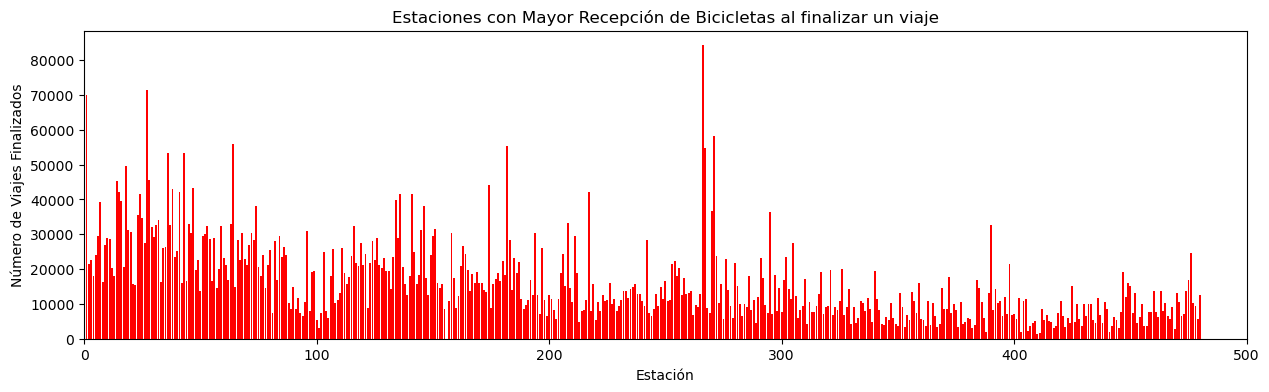

In [11]:
#Estaciones que Reciben mayor cantidad de Bicicletas
campo = "Ciclo_Estacion_Arribo"

sqlstr = f"""select {campo} estacion, count(*) viajes_realizados
from ecobiciarribos
group by  estacion
order by 2 desc
"""

print(nombre)
spark.sql(sqlstr).show(5)
dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(15,4))
plt.bar(dfh['estacion'], dfh['viajes_realizados'], color='r')
plt.xlim(0, 500)

plt.xlabel('Estación')
plt.ylabel('Número de Viajes Finalizados')
plt.title('Estaciones con Mayor Recepción de Bicicletas al finalizar un viaje')

print("En esta grafica se observa que las estaciones 266, 27, 1, 271 y 64 son las que recibieron la mayor cantidad de bicicletas a lo largo del año.\n")


 Ricardo Madrigal Urencio 



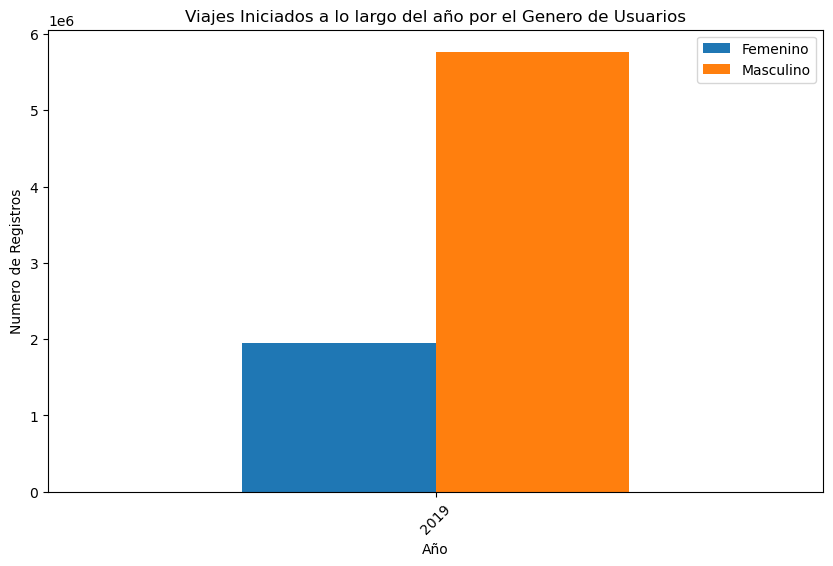

En esta grafica se puede observar como los hombres utilizan casi el triple las bicicletas que las mujeres.



In [12]:
#Genero de Usuarios a lo largo del año

sqlstr = f"""
select anio_retiro,
       sum(case when Genero_Usuario = 'F' then nr else 0 end) as Femenino,
       sum(case when Genero_Usuario = 'M' then nr else 0 end) as Masculino
from (
    select Genero_Usuario, anio_retiro, count(*) as nr
    from ecobiciretiros
    group by Genero_Usuario, anio_retiro
) as d
group by anio_retiro
order by 1;
"""
print(nombre)
dfh = spark.sql(sqlstr).toPandas()\
    .set_index('anio_retiro')[['Femenino', 'Masculino']]\
    .plot(kind='bar', stacked=False, figsize=(10,6))

plt.xlabel('Año')
plt.ylabel('Numero de Registros')
plt.title('Viajes Iniciados a lo largo del año por el Genero de Usuarios') 
plt.xticks(rotation=45)

plt.show()

print("En esta grafica se puede observar como los hombres utilizan casi el triple las bicicletas que las mujeres.\n")

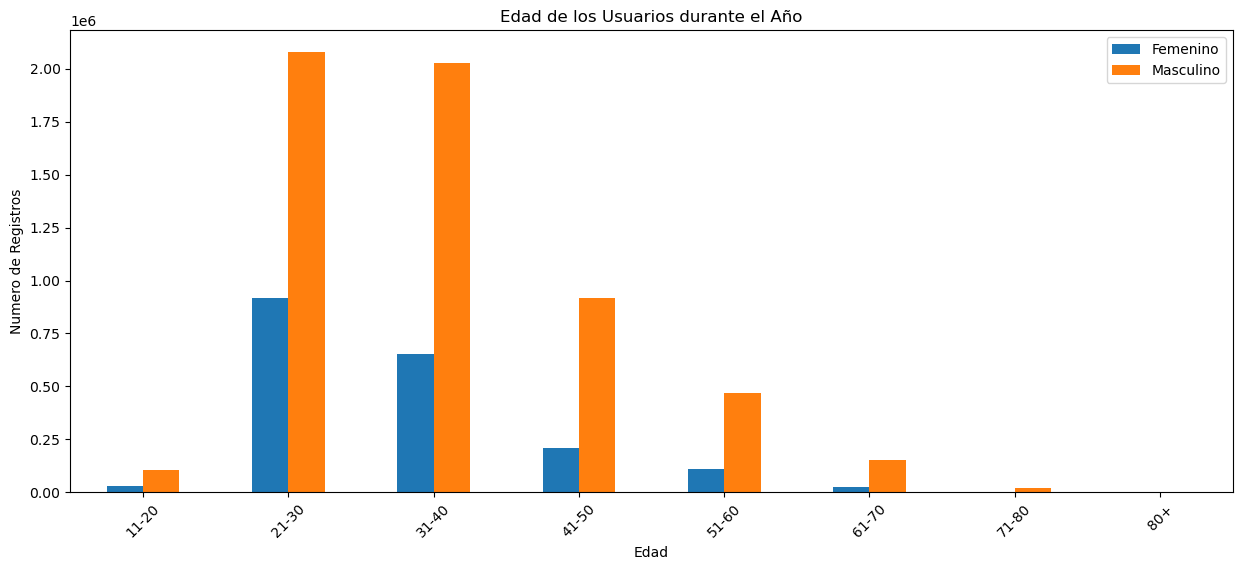

In [13]:
sqlstr = f"""
select
  anio_retiro,
  rango_edad,
  sum(CASE WHEN Genero_Usuario = 'F' then num_usuarios ELSE 0 END) as Femenino,
  sum(CASE WHEN Genero_Usuario = 'M' then num_usuarios ELSE 0 END) as Masculino
from
  (
    select
      anio_retiro,
      Genero_Usuario,
      case
        when Edad_Usuario between 11 and 20 then '11-20'
        when Edad_Usuario between 21 and 30 then '21-30'
        when Edad_Usuario between 31 and 40 then '31-40'
        when Edad_Usuario between 41 and 50 then '41-50'
        when Edad_Usuario between 51 and 60 then '51-60'
        when Edad_Usuario between 61 and 70 then '61-70'
        when Edad_Usuario between 71 and 80 then '71-80'
        else '80+'
      end as rango_edad,
      count(*) as num_usuarios
    from
      ecobiciretiros
    where Genero_Usuario IS NOT NULL
    group by
      anio_retiro,
      Genero_Usuario,
      rango_edad
    order by rango_edad
  ) as b
group by
  anio_retiro,
  rango_edad
order by rango_edad asc
"""

# Ejecutar la consulta y convertir a Pandas
dfh = spark.sql(sqlstr).toPandas() \
      .set_index('rango_edad')[['Femenino', 'Masculino']] \
      .plot(kind='bar', stacked=False, figsize=(15,6))

plt.xlabel('Edad')
plt.ylabel('Numero de Registros')
plt.title('Edad de los Usuarios durante el Año')
plt.xticks(rotation=45)

plt.show()

In [14]:
#Generar 5 Agrupamientos
##Unión de Fechas de retiro y Fechas de Arribo por Bicicleta
from pyspark.sql.functions import coalesce

sqlstr = """
select ea.Bici, Fecha_Retiro, substring(Hora_Retiro, 12, 18) as Hora_Registro, Fecha_Arribo, Hora_Arribo
from ecobiciretiros er
left join ecobiciarribos ea
on (er.id = ea.id)
where ea.Bici is not null
order by 1 desc
"""

spark.sql(sqlstr).show(10, truncate = False)

+-----+------------+-------------+------------+-------------------+
|Bici |Fecha_Retiro|Hora_Registro|Fecha_Arribo|Hora_Arribo        |
+-----+------------+-------------+------------+-------------------+
|15339|2019-09-02  |09:09:44     |2019-02-01  |2024-10-21 17:11:48|
|15339|2019-10-02  |07:46:32     |2019-09-02  |2024-10-21 17:14:02|
|15339|2019-09-02  |07:55:40     |2019-06-02  |2024-10-21 12:04:59|
|15339|2019-12-02  |17:49:48     |2019-09-02  |2024-10-21 17:14:02|
|15339|2019-02-03  |11:46:43     |2019-12-03  |2024-10-21 08:07:26|
|15339|2019-08-02  |06:43:45     |2019-09-02  |2024-10-21 17:14:02|
|15339|2019-02-01  |14:56:15     |2019-06-02  |2024-10-21 12:04:59|
|15339|2019-03-02  |00:17:37     |2019-09-02  |2024-10-21 17:14:02|
|15339|2019-02-01  |11:20:34     |2019-08-01  |2024-10-21 11:35:30|
|15339|2019-11-02  |17:13:42     |2019-09-02  |2024-10-21 17:14:02|
+-----+------------+-------------+------------+-------------------+
only showing top 10 rows



In [15]:
##Unión para Identificar Viajes Redondos

sqlstr = """
select er.Bici, Fecha_Retiro, substring(Hora_Retiro, 12, 18) as Hora_Registro, Hora_Arribo, Ciclo_Estacion_Arribo as Estacion
from ecobiciretiros er
join ecobiciarribos ea 
on (er.id = ea.id)
where er.Ciclo_Estacion_Retiro = ea.Ciclo_Estacion_Arribo
"""
spark.sql(sqlstr).show(10, truncate = False)

+-----+------------+-------------+-------------------+--------+
|Bici |Fecha_Retiro|Hora_Registro|Hora_Arribo        |Estacion|
+-----+------------+-------------+-------------------+--------+
|7984 |2019-10-01  |06:07:27     |2024-10-21 06:43:12|1       |
|8812 |2019-12-01  |11:43:05     |2024-10-21 08:39:06|1       |
|11557|2019-02-01  |08:23:23     |2024-10-21 08:39:45|1       |
|3471 |2019-09-01  |13:37:27     |2024-10-21 13:51:28|1       |
|6778 |2019-03-01  |09:06:55     |2024-10-21 14:02:41|1       |
|7000 |2019-07-01  |12:25:41     |2024-10-21 11:34:20|1       |
|10855|2019-10-01  |10:50:07     |2024-10-21 11:13:11|1       |
|8634 |2019-05-01  |22:22:41     |2024-10-21 23:07:22|1       |
|8325 |2019-04-01  |13:45:22     |2024-10-21 14:48:26|1       |
|4178 |2019-12-02  |07:47:58     |2024-10-21 13:56:39|1       |
+-----+------------+-------------+-------------------+--------+
only showing top 10 rows



In [16]:
##Unión para el número de viajes por año y mes

sqlstr = """
select er.anio_retiro, er.mes_retiro, COUNT(*) AS numero_viajes
from ecobiciretiros er
join ecobiciarribos ea 
on (er.id = ea.id)
group by er.anio_retiro, er.mes_retiro
order by er.anio_retiro, er.mes_retiro desc
"""
spark.sql(sqlstr).show(12, truncate = False)

+-----------+----------+-------------+
|anio_retiro|mes_retiro|numero_viajes|
+-----------+----------+-------------+
|2019       |September |7322340      |
|2019       |October   |7689994      |
|2019       |November  |7490685      |
|2019       |May       |7716734      |
|2019       |March     |7717505      |
|2019       |June      |7500306      |
|2019       |July      |7538532      |
|2019       |January   |902          |
|2019       |February  |7414866      |
|2019       |December  |6425298      |
|2019       |August    |7712085      |
|2019       |April     |7462554      |
+-----------+----------+-------------+



In [17]:
## Estaciones Populares

sqlstr = """
select er.Ciclo_Estacion_Retiro, ea.Ciclo_Estacion_Arribo, count(*) as numero_viajes
from ecobiciretiros er
join ecobiciarribos ea 
on (er.id = ea.id)
group by er.Ciclo_Estacion_Retiro, ea.Ciclo_Estacion_Arribo
order by numero_viajes desc
"""
spark.sql(sqlstr).show(10, truncate = False)

+---------------------+---------------------+-------------+
|Ciclo_Estacion_Retiro|Ciclo_Estacion_Arribo|numero_viajes|
+---------------------+---------------------+-------------+
|27                   |266                  |9726         |
|271                  |27                   |9095         |
|271                  |266                  |8645         |
|18                   |1                    |8387         |
|1                    |266                  |8249         |
|27                   |1                    |8181         |
|271                  |1                    |8061         |
|27                   |27                   |7865         |
|1                    |1                    |7830         |
|1                    |27                   |7525         |
+---------------------+---------------------+-------------+
only showing top 10 rows



In [18]:
##Unión para duración promedio de los viajes

sqlstr = """
select er.Ciclo_Estacion_Retiro, abs(avg(datediff(ea.Fecha_Arribo, er.Fecha_Retiro))) as minutos_duracion_promedio
from ecobiciretiros er
join ecobiciarribos ea 
on (er.id = ea.id)
group by er.Ciclo_Estacion_Retiro
order by 2 desc
"""
spark.sql(sqlstr).show(10, truncate = False)

+---------------------+-------------------------+
|Ciclo_Estacion_Retiro|minutos_duracion_promedio|
+---------------------+-------------------------+
|156                  |156.7192513368984        |
|1000                 |151.54545454545453       |
|1001                 |109.45086705202313       |
|3002                 |90.36363636363636        |
|3001                 |75.1038961038961         |
|1002                 |68.62068965517241        |
|442                  |60.11921173559562        |
|17                   |49.011132817455284       |
|101                  |46.32228483777385        |
|4                    |40.3222209061297         |
+---------------------+-------------------------+
only showing top 10 rows

